In [161]:
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
data= pd.read_csv("heart.csv")

In [163]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [164]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [165]:
data_dup = data.duplicated().any()

In [166]:
data_dup

True

In [167]:
data = data.drop_duplicates()

In [168]:
data_dup = data.duplicated().any()

In [169]:
data_dup

False

In [170]:
cate_val = []
const_val = []

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        const_val.append(column)

In [171]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [172]:
const_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [173]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [174]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [175]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [176]:
from sklearn.preprocessing import StandardScaler

In [177]:
st = StandardScaler()
data[const_val] = st.fit_transform(data[const_val])

In [178]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [179]:
X = data.drop('target',axis=1)

In [180]:
y = data['target']

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [183]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,False,False,False,False,...,True,True,False,False,True,False,False,False,False,True
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,False,True,False,False,...,False,False,True,True,False,False,False,False,True,False


In [184]:
y_train

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

In [185]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,False,True,False,False,...,False,True,False,True,False,False,False,False,False,True
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,False,False,False,True,...,True,True,False,False,True,False,False,True,False,False
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1.391408,-0.029032,-0.287311,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
123,1.171205,0,0.478910,3.299932,0.324963,-0.209608,False,True,False,True,...,False,False,True,True,False,False,False,False,True,False
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,False,False,False,False,...,True,False,True,True,False,False,False,False,False,True
274,1.281911,1,1.619532,-0.358057,-0.505981,1.084022,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [186]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

In [187]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [190]:
y_pred1 = log.predict(X_test)

In [191]:
from sklearn.metrics import accuracy_score

In [192]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

In [193]:
from sklearn import svm

In [194]:
svm = svm.SVC()

In [195]:
svm.fit(X_train,y_train)

SVC()

In [196]:
y_pred2 = svm.predict(X_test)

In [197]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

In [198]:
from sklearn.neighbors import KNeighborsClassifier

In [199]:
knn = KNeighborsClassifier()

In [200]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [201]:
y_pred3 = knn.predict(X_test)

In [202]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [203]:
score = []

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [204]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [205]:
 knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
(accuracy_score(y_test,y_pred))

0.8032786885245902

In [206]:
data = pd.read_csv('heart.csv')

In [207]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [208]:
data = data.drop_duplicates()

In [209]:
data.shape

(302, 14)

In [210]:
X = data.drop('target',axis=1)
y= data['target']

In [211]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [212]:
from sklearn.tree import DecisionTreeClassifier

In [213]:
dt = DecisionTreeClassifier()

In [214]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [215]:
y_pred4 = dt.predict(X_test)

In [216]:
accuracy_score(y_test,y_pred4)

0.6885245901639344

In [217]:
from sklearn.ensemble import RandomForestClassifier

In [218]:
rf = RandomForestClassifier()

In [219]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [220]:
y_pred5 = rf.predict(X_test)

In [221]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

In [222]:
final_data = pd.DataFrame({'MODELS':['LR','SVM','KNN','DT','RF'],'ACC':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5)]})

In [223]:
final_data

,MODELS,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.688525
4,RF,0.836066


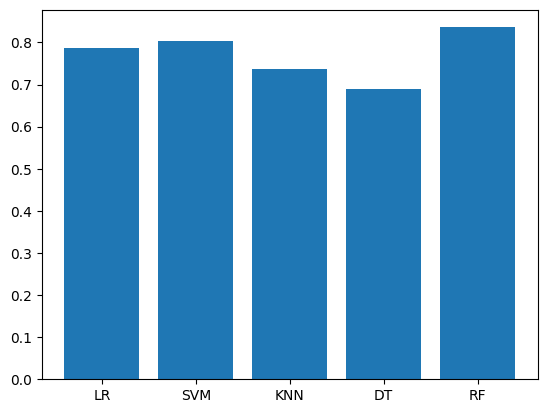

In [224]:
x=['LR','SVM','KNN','DT','RF']
y=[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5)]
plt.bar(x,y)
plt.show()

In [225]:
X = data.drop('target',axis=1)  
y= data['target']

In [226]:
X.shape

(302, 13)

In [227]:
from sklearn.ensemble import RandomForestClassifier

In [228]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [229]:
import pandas as pd

In [230]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [231]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [232]:
p = rf.predict(new_data)
if p[0]==0:
    print("NO DISEASE")
else:
    print("DISEASE")

NO DISEASE


In [233]:
import joblib

In [234]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [235]:
model = joblib.load('model_joblib_heart')

In [236]:
model.predict(new_data)

array([0], dtype=int64)

In [251]:
from tkinter import *
import joblib

In [ ]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())   
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result = model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])

    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master,text="Possibility of Heart Disease").grid(row=31)

master = Tk()
master.title("Heart Disease Prediction System")

label = Label(master, text = "Heart Disease Prediction System",bg = "black" , fg = "white").grid(row=0,columnspan=2)

Label(master, text="Enter your age").grid(row=1)
Label(master, text="Male or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)

Button(master,text='Predict', command=show_entry_fields).grid()

mainloop()